In [15]:
import pandas as pd
import seaborn as sns

In [16]:
df = pd.read_csv('churn.csv')

In [17]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
x = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
y = df['Exited']

<Axes: xlabel='Exited', ylabel='count'>

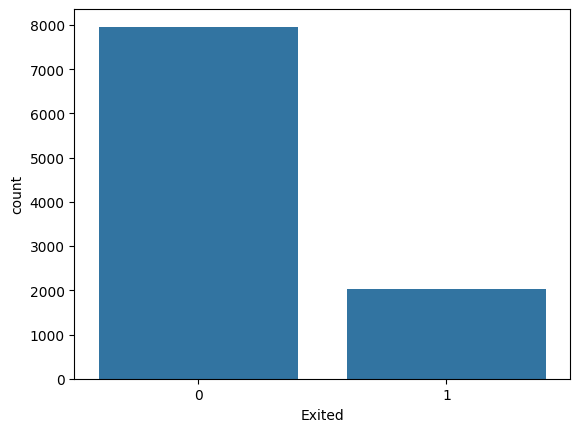

In [26]:
sns.countplot(x = y)

In [28]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [29]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [34]:
from imblearn.over_sampling import RandomOverSampler
rnn = RandomOverSampler(random_state = 0)
x_res , y_res = rnn.fit_resample(x,y)

In [35]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_res)
x_scaled

array([[-0.29877723,  0.08418894, -1.01840607, ...,  0.6512495 ,
         1.08223556,  0.00817382],
       [-0.4103938 , -0.01032629, -1.36135608, ..., -1.53550983,
         1.08223556,  0.20261687],
       [-1.48597169,  0.08418894,  1.03929402, ...,  0.6512495 ,
        -0.92401325,  0.22674468],
       ...,
       [-0.84671313,  1.02934128,  0.01044398, ...,  0.6512495 ,
        -0.92401325,  1.28878188],
       [-0.96847667,  0.65128034, -0.67545605, ..., -1.53550983,
         1.08223556, -1.21851316],
       [-1.5874413 ,  0.74579558,  1.03929402, ...,  0.6512495 ,
         1.08223556,  1.42417217]], shape=(15926, 8))

In [41]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(x_scaled , y_res , test_size=0.2 , random_state = 0)

In [43]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=(100,100,100) , max_iter=100 , activation='relu' , random_state=0)
ann.fit(X_train , Y_train)

C:\Users\Shreya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(100, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,100
,shuffle,True
,random_state,0


In [44]:
y_pred = ann.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix ,classification_report

In [46]:
print(f"ANN")
print(f"accuracy : {accuracy_score(Y_test , y_pred)}")

ANN
accuracy : 0.8688010043942247


In [50]:
print(confusion_matrix(Y_test, y_pred))

[[1362  228]
 [ 190 1406]]


In [49]:
print(classification_report(Y_test , y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1590
           1       0.86      0.88      0.87      1596

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186



In [51]:
from sklearn.metrics import ConfusionMatrixDisplay

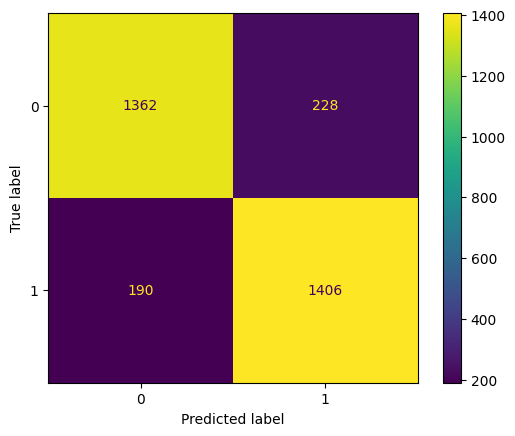

In [52]:
ConfusionMatrixDisplay.from_predictions(Y_test , y_pred)